In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import chi2_contingency

df = pd.read_csv('coded.csv')
def calculate_conditional_probability_for_category(df, condition_column, condition_value, event_column, event_value):
    """
    Calculate conditional probability for a specific category in the condition column given the event column.

    Parameters:
    - df (pd.DataFrame): The input DataFrame.
    - condition_column (str): The column for which conditional probability is calculated.
    - condition_value: The specific category in the condition column.
    - event_column (str): The column representing the event.
    - event_value: The specific category in the event column.
    """
    condition_occurrences = df[df[condition_column] == condition_value].shape[0]
    event_and_condition_occurrences = df[(df[condition_column] == condition_value) & (df[event_column] == event_value)].shape[0]

    if condition_occurrences == 0:
        return 0  # To avoid division by zero

    conditional_probability = event_and_condition_occurrences / condition_occurrences
    return conditional_probability



def calculate_conditional_probability(df, condition_column, event_column):
    # Group by the condition column and calculate the conditional probabilities
    probabilities = df.groupby(condition_column)[event_column].value_counts(normalize=True).unstack()

    # Fill NaN values with 0 (when the condition is not present for a specific event)
    probabilities = probabilities.fillna(0)

    return probabilities



def cramers_v(df, x, y):
    confusion_matrix = pd.crosstab(df[x], df[y])

    chi2, _, _, _ = chi2_contingency(confusion_matrix)
    n = confusion_matrix.sum().sum()
    phi2 = chi2 / n
    r, k = confusion_matrix.shape
    phi2corr = max(0, phi2 - ((k-1)*(r-1))/(n-1))
    rcorr = r - ((r-1)**2)/(n-1)
    kcorr = k - ((k-1)**2)/(n-1)

    return np.sqrt(phi2corr / min((kcorr-1), (rcorr-1)))


cramers_v_education_obligation = cramers_v(df, "Education", "Under normal circumstances, does a person who reclines their seat during a flight have any obligation to the person sitting behind them?")
print(cramers_v_education_obligation)


0.04496528326559228


Education                                                0.0       1.0  \
Under normal circumstances, does a person who r...                       
0.0                                                 0.000000  0.059603   
1.0                                                 0.011215  0.080374   

Education                                                2.0       3.0  \
Under normal circumstances, does a person who r...                       
0.0                                                 0.278146  0.357616   
1.0                                                 0.265421  0.319626   

Education                                                4.0  
Under normal circumstances, does a person who r...            
0.0                                                 0.304636  
1.0                                                 0.323364  


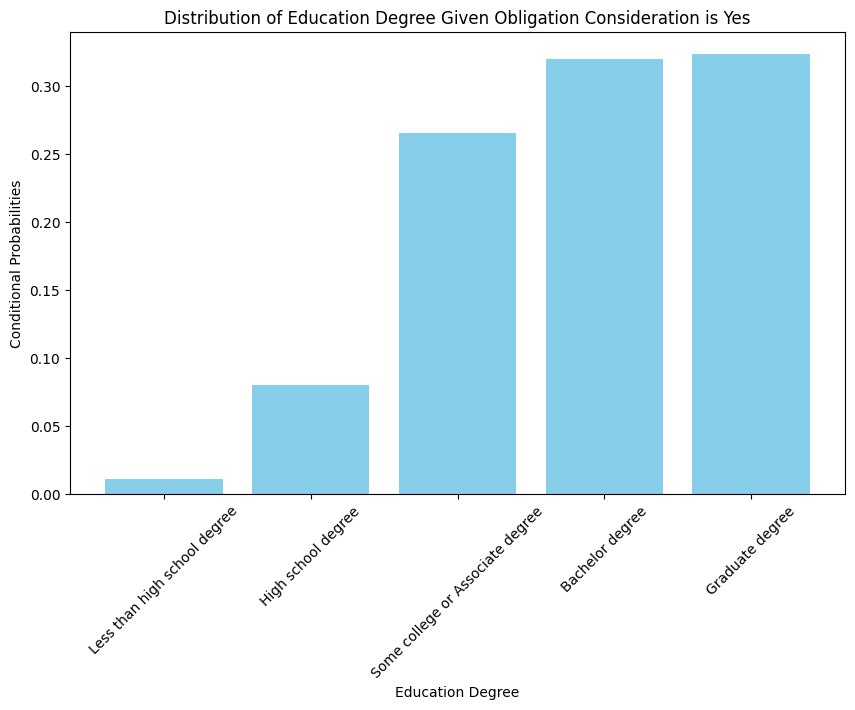

In [4]:
# Data for the plot
education_levels = ['Less than high school degree', 'High school degree', 'Some college or Associate degree', 
                    'Bachelor degree', 'Graduate degree']

education_obligation = calculate_conditional_probability(df, "Under normal circumstances, does a person who reclines their seat during a flight have any obligation to the person sitting behind them?", "Education")
print(education_obligation)


# Creating the plot
plt.figure(figsize=(10, 6))
plt.bar(education_levels, education_obligation.loc[1.0], color='skyblue')

# Adding title and labels
plt.title("Distribution of Education Degree Given Obligation Consideration is Yes")
plt.xlabel("Education Degree")
plt.ylabel("Conditional Probabilities")

# Rotating the x-axis labels for better readability
plt.xticks(rotation=45)

# Display the plot
plt.show()

In [6]:
from features_trans_back import features_trans_back_shortened as ftbs
education_obligation.reset_index().columns[0]

'Under normal circumstances, does a person who reclines their seat during a flight have any obligation to the person sitting behind them?'

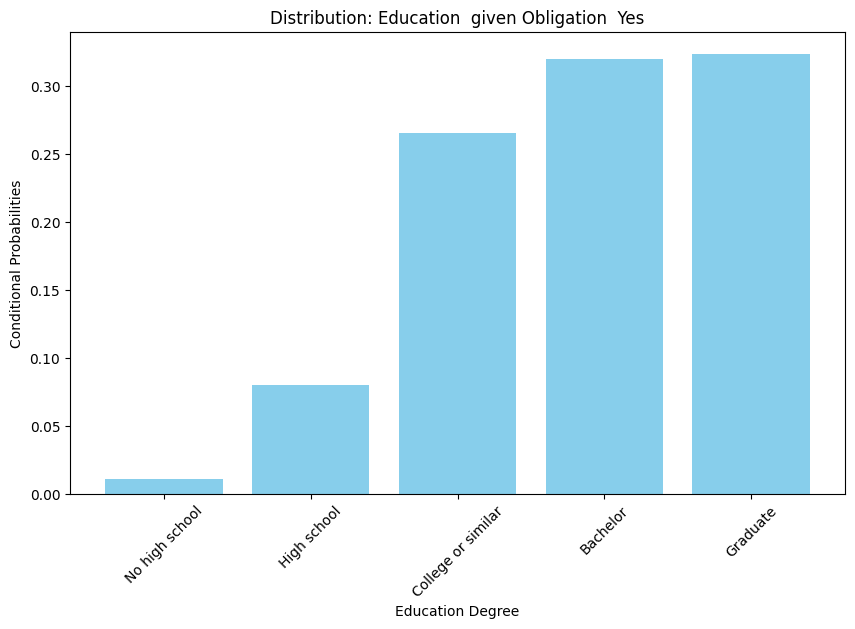

In [7]:
from features_trans_back import features_trans_back_shortened as ftbs
from features_trans_back import question_short as qs


def plot_conditional_probs(df, condition, ftbs, qs):
    # Data for the plot
    categories = ftbs(df.keys().name)
    categories_labels = list(categories.values())

    event_qs = qs((df.keys().name))
    condition_qs = df.reset_index().columns[0]
    # Creating the plot
    plt.figure(figsize=(10, 6))
    plt.bar(categories_labels, df.loc[condition], color='skyblue')

    # Adding title and labels
    plt.title(f"Distribution: {qs(event_qs)}  given {qs(condition_qs)}  {ftbs(condition_qs, condition)}" )
    plt.xlabel("Education Degree")
    plt.ylabel("Conditional Probabilities")

    # Rotating the x-axis labels for better readability
    plt.xticks(rotation=45)

    # Display the plot
    plt.show()

plot_conditional_probs(education_obligation, 1.0, ftbs, qs)
